In [87]:
import multiprocessing
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1


In [249]:
data.loc[0]['enlace_pdf']

'https://www.congreso.es:443/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-2.PDF'

In [118]:
import pandas as pd
data = pd.read_csv('data/final/plenos-xiv-tokens.csv')
data = data.loc[(data['political_group'].notnull())].reset_index(drop=True)

In [119]:
groups = ['GS', 'GP', 'GVOX', 'GCUP-EC-GC', 'GPlu', 'GR', 'GCs',
          'GV (EAJ-PNV)', 'GEH Bildu', 'GMx']

data = data[data['political_group'].isin(groups)].reset_index(drop=True)


In [202]:
#df = pd.DataFrame(data.groupby(['orador'], as_index=False)['cleaned_text'].aggregate(sum)).dropna()
# Not grouping by speaker and just keeping several items with the same label.
df = data[['orador', 'cleaned_text']]
df.columns = ['orador', 'text']
df = df.loc[df['text'] != 0].reset_index(drop=True)


In [203]:
df.head()

,orador,text
0,"Borràs Castanyer, Laura (GPlu)","['empieza', 'año', 'volvemos', 'debate', 'inve..."
1,"Baldoví Roda, Joan (GPlu)","['moltes', 'gràcies', 'senyora', 'encanta', 'o..."
2,"Quevedo Iturbe, Pedro (GPlu)","['candidato', 'presidencia', 'buenas', 'tardes..."
3,"Oramas González-Moro, Ana María (GPlu)","['dijo', 'neruda', 'podría', 'escribir', 'vers..."
4,"Sabanés Nadal, Inés (GPlu)","['pesar', 'exageración', 'pesar', 'sobreactuac..."


In [204]:
corpus = df.values.tolist()

In [206]:
import smart_open
import gensim

def read_corpus(fname):
    for line in fname:
        yield gensim.models.doc2vec.TaggedDocument(line[1], [line[0]])

train_corpus = list(read_corpus(corpus))

In [207]:
model0 = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=200, window=20, min_count=50, workers=cores, epochs=5)

2023-02-28 13:32:00,477 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d200,n5,w20,mc50,s0.001,t8)', 'datetime': '2023-02-28T13:32:00.477162', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [208]:
model0.build_vocab(train_corpus)

2023-02-28 13:32:01,709 : INFO : collecting all words and their counts
2023-02-28 13:32:01,711 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2023-02-28 13:32:01,712 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2023-02-28 13:32:06,228 : INFO : collected 88 word types and 366 unique tags from a corpus of 9382 examples and 42677461 words
2023-02-28 13:32:06,228 : INFO : Creating a fresh vocabulary
2023-02-28 13:32:06,229 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=50 retains 53 unique words (60.22727272727273%% of original 88, drops 35)', 'datetime': '2023-02-28T13:32:06.229530', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2023-02-28 13:32:06,230 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=50 leaves 42677147 word corpus (9

In [209]:
model0.train(train_corpus, total_examples=len(train_corpus), epochs=model0.epochs)

2023-02-28 13:32:06,271 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 8 workers on 53 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=20 shrink_windows=True', 'datetime': '2023-02-28T13:32:06.271452', 'gensim': '4.1.2', 'python': '3.8.13 (default, Mar 28 2022, 06:16:26) \n[Clang 12.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2023-02-28 13:32:07,278 : INFO : EPOCH 1 - PROGRESS: at 4.99% examples, 430345 words/s, in_qsize 15, out_qsize 0
2023-02-28 13:32:08,278 : INFO : EPOCH 1 - PROGRESS: at 10.25% examples, 455709 words/s, in_qsize 15, out_qsize 0
2023-02-28 13:32:09,284 : INFO : EPOCH 1 - PROGRESS: at 17.26% examples, 467307 words/s, in_qsize 15, out_qsize 0
2023-02-28 13:32:10,290 : INFO : EPOCH 1 - PROGRESS: at 23.63% examples, 475101 words/s, in_qsize 15, out_qsize 0
2023-02-28 13:32:11,293 : INFO : EPOCH 1 - PROGRESS: at 29.11% examples, 469061 words/s, in_qsize 15, out_qsize 0
2023-02-28 13:32:12,295 : INFO : 

In [135]:
#model0.save('models/plenos-xiv-no-PV-DM.model')

In [247]:
# Infering a vector based on some words.
vector = model0.infer_vector(
    ['gracias', 'democracia', 'derechos', 'país', 'aborto', 'feminismo'])

vector

array([-1.9569895e-03,  2.1450641e-03, -2.0993107e-03,  1.4450682e-03,
        4.8630981e-04, -1.9334790e-03, -8.8980078e-04,  9.9544611e-04,
       -1.7259362e-03,  2.0174601e-03, -8.6056891e-05, -1.5208247e-03,
       -1.7367065e-04,  4.1470230e-05, -8.7998644e-04,  2.1136715e-03,
       -5.8097555e-04, -1.6804043e-03, -2.2193432e-04, -1.8250734e-03,
        2.1989807e-03, -8.5202308e-05,  2.5001346e-04,  5.1870378e-04,
        7.2958675e-04, -2.0362816e-03, -1.0783640e-03,  1.0861394e-03,
       -1.5266644e-03,  1.4996189e-03,  7.2225812e-04,  7.5190840e-04,
        7.4027211e-04,  1.0324237e-03,  1.0142871e-03,  1.3102219e-03,
       -1.0291530e-03, -1.6229025e-03, -2.2089845e-03, -2.1979602e-03,
       -2.1573496e-03, -1.3476418e-03, -5.1988603e-04, -1.8058985e-04,
       -3.0111626e-04, -1.9186656e-03,  1.9482705e-03, -7.4858801e-04,
       -1.5037704e-03,  6.1715365e-04, -2.3617258e-03, -2.1357811e-03,
       -4.5565458e-04,  9.9421327e-04,  7.2157860e-04,  1.3424900e-03,
      

In [229]:
# PCA on the model.
import numpy as np
from sklearn.decomposition import PCA

def reduce_dimension(model):
    speakers = df['orador'].unique().tolist()
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i,:] = model.dv[i]

    dr = PCA(n_components = 2)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)
    Z.columns = ['dim1', 'dim2']
    Z['speaker'] = speakers

    return Z

In [225]:
len(model0.dv)

366

In [226]:
model0.dv[0]

array([-0.09183258,  0.42909685, -0.14985499, -0.27746406, -0.12168497,
        0.10959573, -0.15952952, -1.078324  ,  0.3576024 , -0.3001439 ,
       -0.20284168,  0.38996866, -0.1543779 , -0.15202017, -0.17667425,
       -0.12604974,  0.03573065,  0.37662637, -0.3995871 ,  0.1981655 ,
        0.26399645,  0.24118327, -0.26927322, -0.0953977 , -0.11492854,
       -0.28297412,  0.17003913,  0.23740934, -0.01745761,  0.44087717,
       -0.22949868,  0.16458026, -0.07085533, -0.2940412 , -0.27223855,
        0.04640717,  0.3648025 , -0.258586  ,  0.07120109,  0.59275085,
       -0.14274465,  0.03803144, -0.1274602 , -0.10966672,  0.0790462 ,
       -0.19177757,  0.24229726, -0.11186869,  0.00277665,  0.1543574 ,
        0.35017592, -0.01959338, -0.3249893 ,  0.07292962,  0.1259472 ,
        0.05864355,  0.05749261, -0.01383116, -0.23278764,  0.47681674,
       -0.27523252, -0.17804892,  0.08018106,  0.10536112, -0.22498387,
        0.11327086, -0.5305901 , -0.16197976, -0.16054213,  0.31

In [230]:
reduced = reduce_dimension(model0)

In [244]:
reduced.loc[reduced['speaker'] == 'Montero Gil, Irene María (GCUP-EC-GC)']

,dim1,dim2,speaker,col
171,-1.224507,-0.32088,"Montero Gil, Irene María (GCUP-EC-GC)",#a245b2


In [241]:
spk = reduced.speaker.tolist()
col = []
for i in range(len(spk)):
    if '(GVOX)' in spk[i]:
        # #82b431
        # rgba(130,180,49,255)
        col.append('#82b431')
    elif '(GS)' in spk[i]:
        # #c10200
        # rgba(193,2,0,255)
        col.append('#c10200')
    elif '(GCs)' in spk[i]:
        # #f87729
        # rgba(248,119,41,255)
        col.append('#f87729')
    elif '(GP)' in spk[i]:
        # #1eb3e6
        # rgba(30,179,230,255)
        col.append('#1eb3e6')
    elif '(GCUP-EC-GC)' in spk[i]:
        # #a245b2
        # rgba(162,69,178,255)
        col.append('#a245b2')
    elif '(GR)' in spk[i]:
        # #f99f00
        # rgba(249,159,0,255)
        col.append('#f99f00')
    elif '(GV (EAJ-PNV))' in spk[i]:
        # #008146
        # rgba(0,129,70,255)
        col.append('#008146')
    elif '(GEH Bildu)' in spk[i]:
        # #bbce00
        # rgba(187,206,0,255)
        col.append('#bbce00')
    else:
        col.append('#000000')

reduced['col'] = col


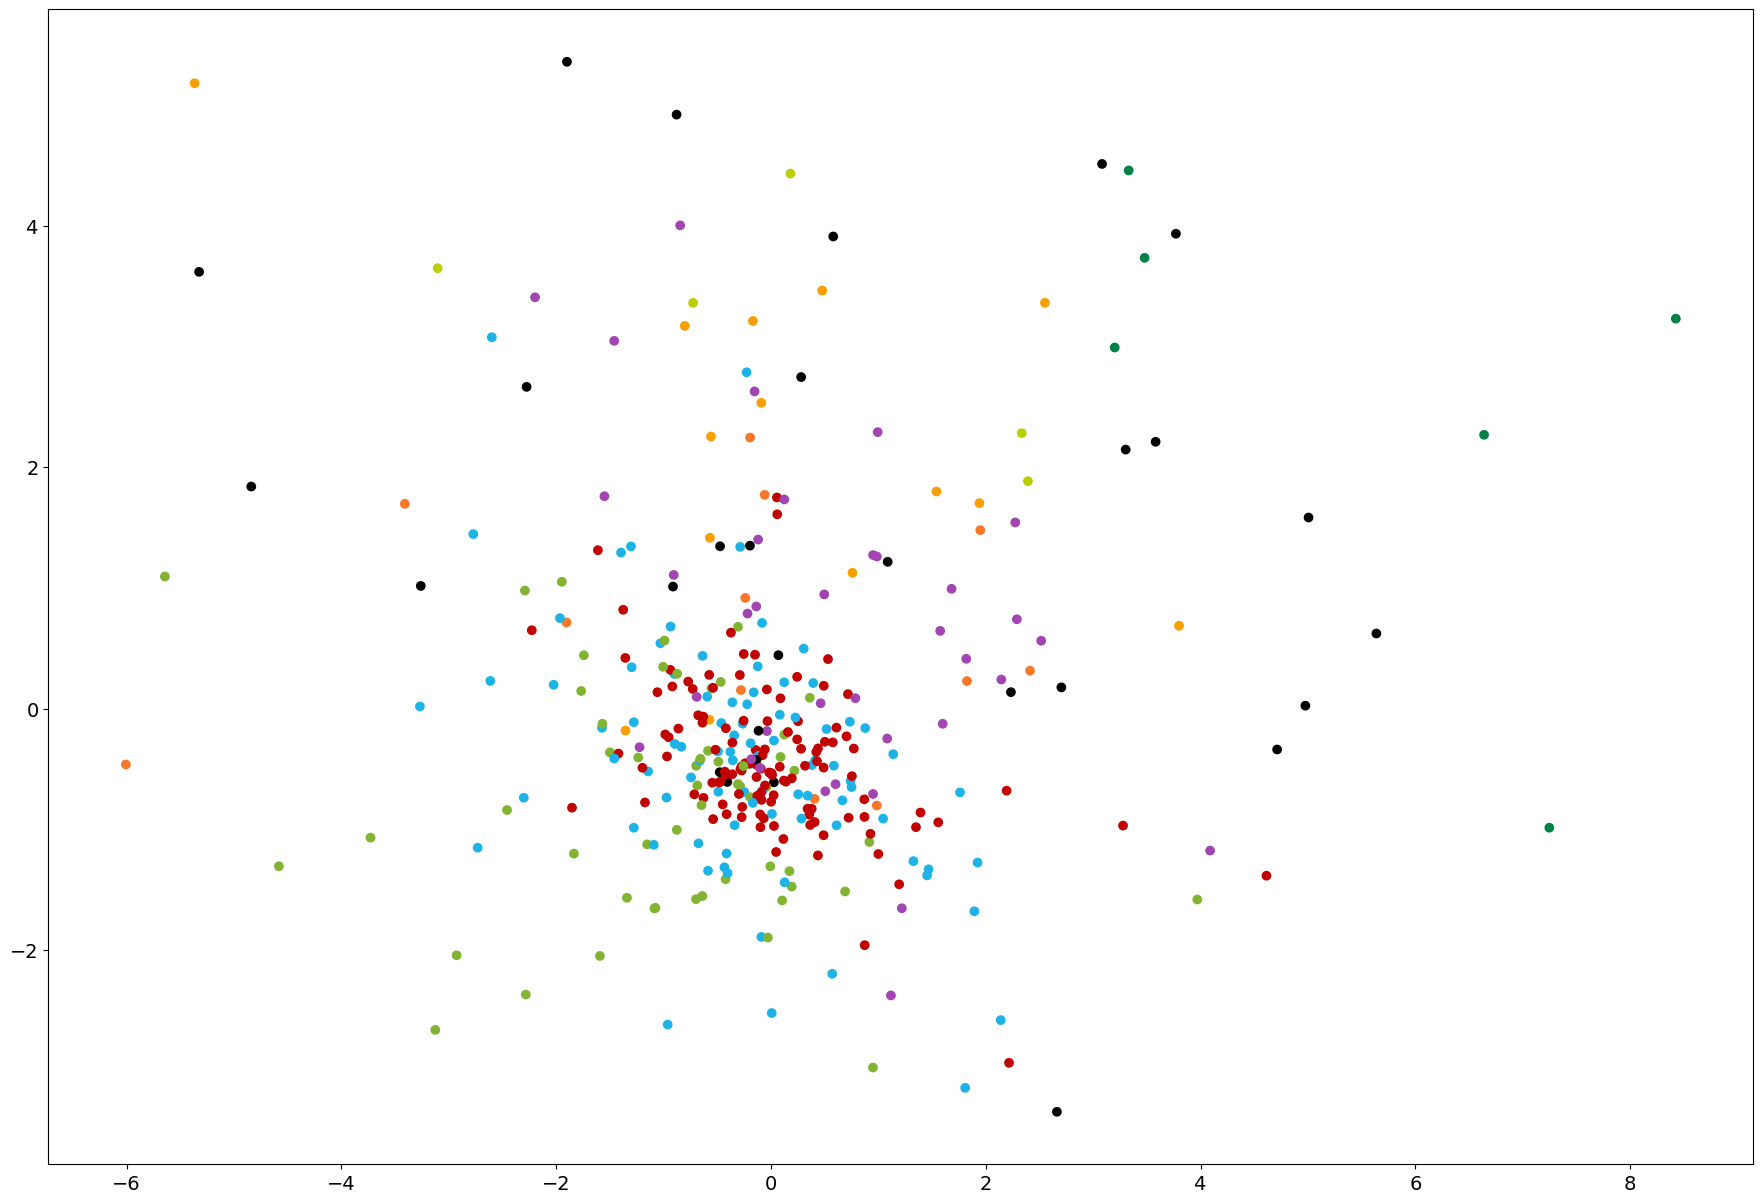

In [242]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['font.size'] = 14

plt.figure(figsize=(22, 15))
plt.scatter(reduced.dim1, reduced.dim2, c=reduced.col)
texts = []

'''
for label, x, y in zip(reduced.speaker, reduced.dim1, reduced.dim2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.3),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
'''
plt.show()

In [236]:
# What if I use T-SNE and plotly.

from plotly import __version__
from plotly import offline as pyoff

pyoff.init_notebook_mode(connected=True)
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly import tools

def rd_tsne(model):
    speakers = df['orador'].unique().tolist()
    S = len(speakers)
    M = model.vector_size
    z = np.zeros((S, M))

    for i in range(S):
        z[i, :] = model.dv[i]

    dr = TSNE(n_components=2)
    Z = dr.fit_transform(z)

    Z = pd.DataFrame(Z)
    Z.columns = ['dim1', 'dim2']
    Z['speaker'] = speakers

    return Z

In [237]:
reduced2 = rd_tsne(model0)

/Users/danielansiadibuja/opt/anaconda3/envs/aba/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/danielansiadibuja/opt/anaconda3/envs/aba/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [239]:
spk = reduced2.speaker.tolist()
col = []
for i in range(len(spk)):
    if '(GVOX)' in spk[i]:
        # #82b431
        # rgba(130,180,49,255)
        col.append('#82b431')
    elif '(GS)' in spk[i]:
        # #c10200
        # rgba(193,2,0,255)
        col.append('#c10200')
    elif '(GCs)' in spk[i]:
        # #f87729
        # rgba(248,119,41,255)
        col.append('#f87729')
    elif '(GP)' in spk[i]:
        # #1eb3e6
        # rgba(30,179,230,255)
        col.append('#1eb3e6')
    elif '(GCUP-EC-GC)' in spk[i]:
        # #a245b2
        # rgba(162,69,178,255)
        col.append('#a245b2')
    elif '(GR)' in spk[i]:
        # #f99f00
        # rgba(249,159,0,255)
        col.append('#f99f00')
    elif '(GV (EAJ-PNV))' in spk[i]:
        # #008146
        # rgba(0,129,70,255)
        col.append('#008146')
    elif '(GEH Bildu)' in spk[i]:
        # #bbce00
        # rgba(187,206,0,255)
        col.append('#bbce00')
    else:
        col.append('#ffffff')

reduced2['col'] = col


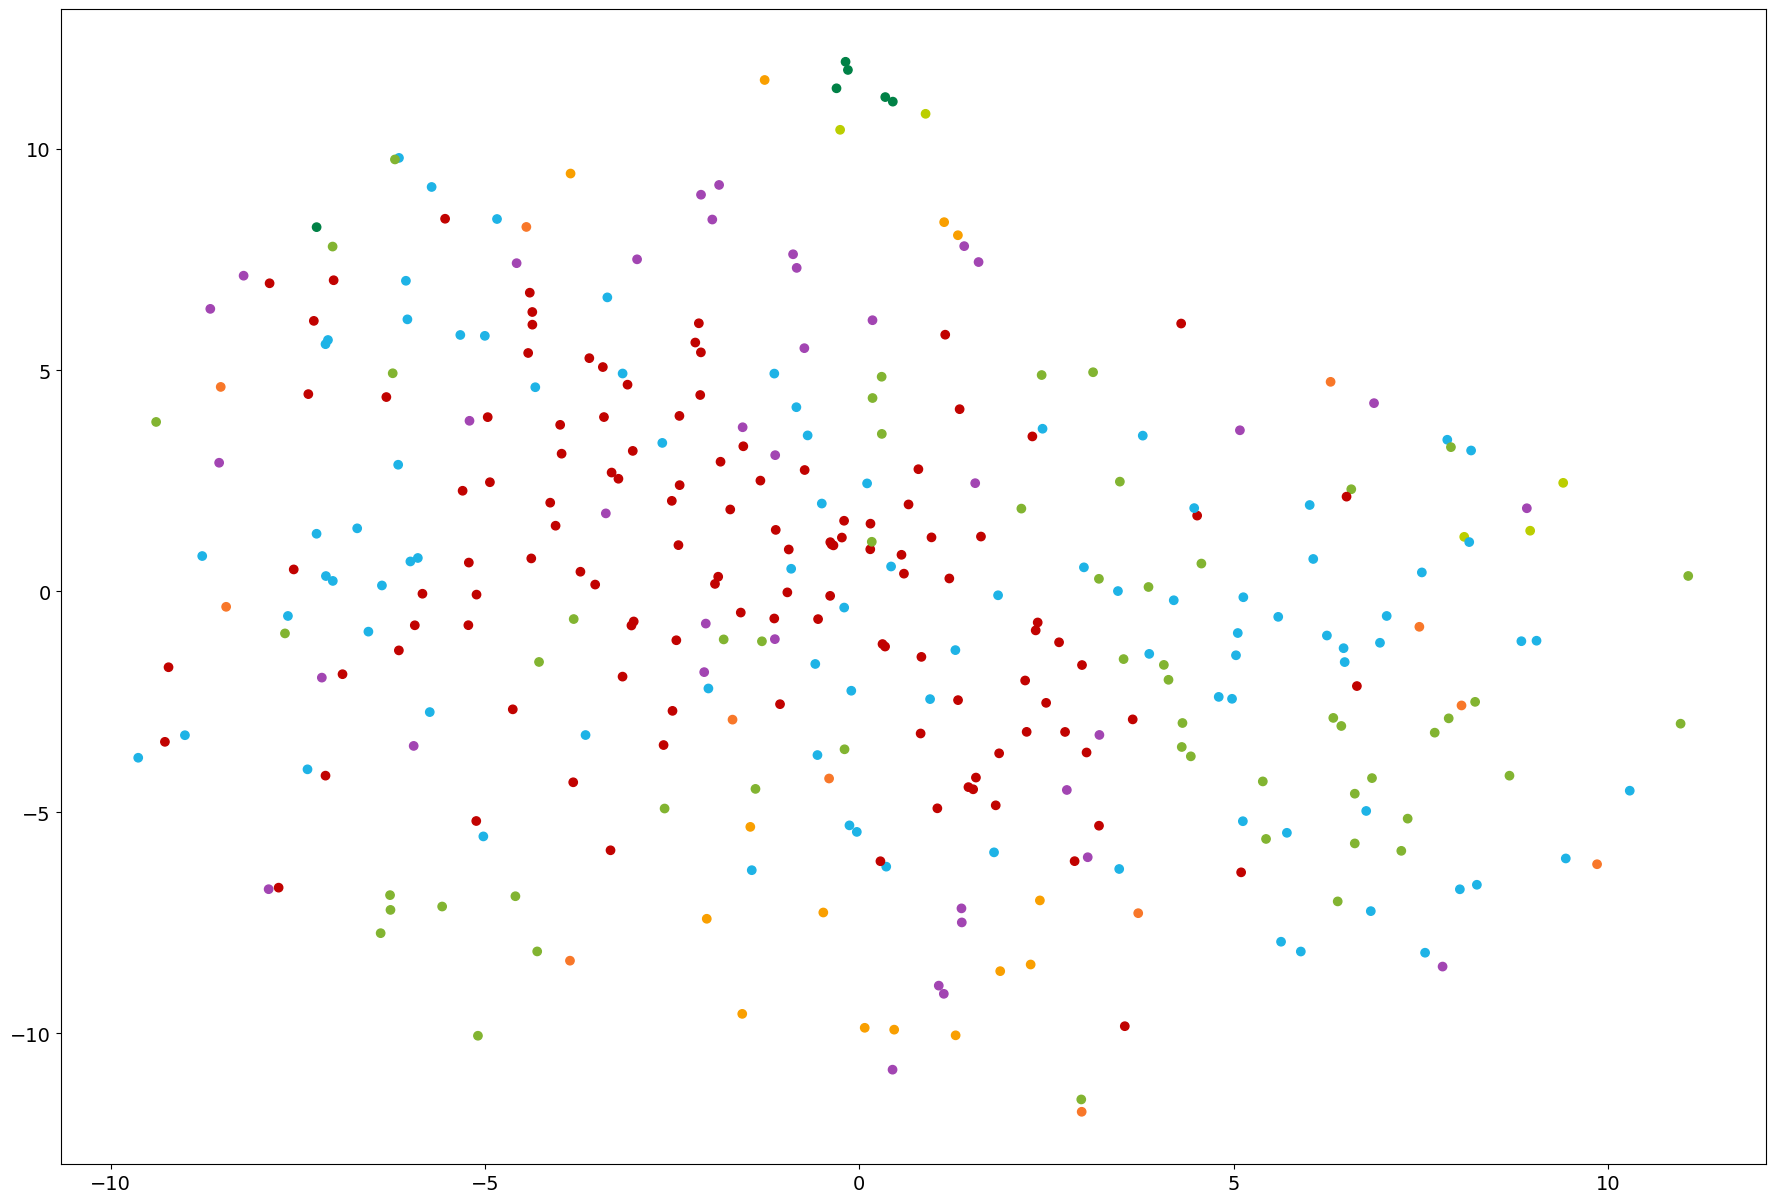

In [240]:
plt.figure(figsize=(22, 15))
plt.scatter(reduced2.dim1, reduced2.dim2, c=reduced2.col)
texts = []

'''
for label, x, y in zip(reduced.speaker, reduced.dim1, reduced.dim2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', alpha=0.3),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
'''
plt.show()
